In [5]:
!kaggle datasets download -d dev0914sharma/customer-clustering

Dataset URL: https://www.kaggle.com/datasets/dev0914sharma/customer-clustering
License(s): copyright-authors
  0%|                                               | 0.00/25.9k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 25.9k/25.9k [00:00<00:00, 9.31MB/s]


In [6]:
!mkdir data

In [7]:
!unzip /kaggle/working/customer-clustering.zip -d /kaggle/working/data

Archive:  /kaggle/working/customer-clustering.zip
  inflating: /kaggle/working/data/segmentation data legend.xlsx  
  inflating: /kaggle/working/data/segmentation data.csv  


In [8]:
import pandas as pd
import plotly.express as px
import numpy as np

In [9]:
df= pd.read_csv("/kaggle/working/data/segmentation data.csv", encoding='unicode_escape', on_bad_lines='skip')

In [10]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [11]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [12]:
df.isnull().values.any()

False

single variable Distribution

1. Customer genders are quite balanced
2. Marital status is also balanced
   

In [13]:
fig = px.pie(df, values='ID', names='Sex')
fig.show()
fig = px.pie(df, values='ID', names='Marital status')
fig.show()

We start by taking a look at the distributions of the numerical variables Age and Income.

    -The variable 'Age' has a heavy right skew, generated because of the lower limit at zero of the variable. If we are using K-Means clustering, there 
    will be no need to normalize the feature, but we may have to do so for other models.
    
    -The feature 'Income' has the same right skew problem as the 'Age' feature. We'll have to be wary of this depending on the model we select.
*  Most customers have highschool level education. 
*     Both the 'Occupation' and 'Settlement size' features seem to have a larger enough quantity of instances of each category.


In [14]:
fig = px.histogram(df, x=df['Age'] ,nbins=20)
fig.update_layout(
    xaxis_title="Ages",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

fig.show()
fig = px.histogram(df, x=df['Income'] ,nbins=20)
fig.update_layout(
    xaxis_title="Incomes",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()
fig = px.histogram(df, x=df['Education'],nbins=20)
fig.update_layout(
    xaxis_title="Education",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.update_xaxes(type='category')
fig.show()
fig = px.histogram(df, x=df['Occupation'],nbins=20)
fig.update_layout(
    xaxis_title="Occupation",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.update_xaxes(type='category')
fig.show()

fig = px.histogram(df, x=df['Settlement size'],nbins=20)
fig.update_layout(
    xaxis_title="Settlement size",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.update_xaxes(type='category')
fig.show()

In [15]:
fig = px.histogram(df, x="Marital status",histfunc="count", color="Sex")
fig.update_xaxes(type='category')
fig.show()
fig = px.histogram(df, x="Education",histfunc="count", color="Sex")
fig.update_xaxes(type='category')
fig.show()
fig = px.histogram(df, x="Income",histfunc="count", color="Sex")
fig.show()

fig = px.histogram(df, x="Occupation",histfunc="count", color="Sex")
fig.update_xaxes(type='category')
fig.show()

fig = px.histogram(df, x="Settlement size",histfunc="count", color="Sex")
fig.update_xaxes(type='category')
fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [16]:
fig = px.histogram(df, x="Education",histfunc="count", color="Marital status")
fig.update_xaxes(type='category')
fig.show()
fig = px.histogram(df, x="Income",histfunc="count", color="Marital status")
fig.show()
fig = px.histogram(df, x="Occupation",histfunc="count", color="Marital status")
fig.update_xaxes(type='category')
fig.show()

fig = px.histogram(df, x="Settlement size",histfunc="count", color="Marital status")
fig.update_xaxes(type='category')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [17]:
fig = px.histogram(df, x="Income",histfunc="count", color="Settlement size")
fig.show()
fig = px.histogram(df, x="Occupation",histfunc="count", color="Settlement size")
fig.update_xaxes(type='category')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [18]:
fig = px.scatter(df,x='Age', y='Income',color=df['Sex'].astype(str))
fig.update_traces(marker_size=8)
fig.show()
fig = px.scatter(df,x='Age', y='Income',color=df['Marital status'].astype(str))
fig.update_traces(marker_size=8)
fig.show()
fig = px.scatter(df,x='Age', y='Income',color=df['Education'].astype(str))
fig.update_traces(marker_size=8)
fig.show()
fig = px.scatter(df,x='Age', y='Income',color=df['Occupation'].astype(str))
fig.update_traces(marker_size=8)
fig.show()
fig = px.scatter(df,x='Age', y='Income',color=df['Settlement size'].astype(str))
fig.update_traces(marker_size=8)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [19]:
corr_mat = df.corr(method='pearson')
print(corr_mat)

                       ID       Sex  Marital status       Age  Education  \
ID               1.000000  0.328262        0.074403 -0.085246   0.012543   
Sex              0.328262  1.000000        0.566511 -0.182885   0.244838   
Marital status   0.074403  0.566511        1.000000 -0.213178   0.374017   
Age             -0.085246 -0.182885       -0.213178  1.000000   0.654605   
Education        0.012543  0.244838        0.374017  0.654605   1.000000   
Income          -0.303217 -0.195146       -0.073528  0.340610   0.233459   
Occupation      -0.291958 -0.202491       -0.029490  0.108388   0.064524   
Settlement size -0.378445 -0.300803       -0.097041  0.119751   0.034732   

                   Income  Occupation  Settlement size  
ID              -0.303217   -0.291958        -0.378445  
Sex             -0.195146   -0.202491        -0.300803  
Marital status  -0.073528   -0.029490        -0.097041  
Age              0.340610    0.108388         0.119751  
Education        0.233459    0

In [20]:
fig = px.imshow(corr_mat, text_auto=True, aspect="auto")
fig.show()

Normality test for the data

Numerical features showed a right skew in their distributions. We will check if the data is normally distributed or not, by using a normality test from scipy. From our visualizations we can already guess that the data isn't normally distributed, but we run the test to have evidence of precisely that.

In [21]:
from scipy import stats

In [22]:
normaltest_result_income = stats.normaltest(df['Income'])[1]
normaltest_result_age    = stats.normaltest(df['Age'])[1]

print(f'The p-value for the null hypothesis of the Income being Normally distributed is {normaltest_result_income}')
print(f'The p-value for the null hypothesis of the Age    being Normally distributed is {normaltest_result_age}')

The p-value for the null hypothesis of the Income being Normally distributed is 2.5009638879187734e-98
The p-value for the null hypothesis of the Age    being Normally distributed is 3.3428344869999675e-56


The p-value for both features is extremely low, and verifies p-value(Income) << p-value(Age) << 0.05. This means that we can reject the hypothesis that the data is normally distributed, so we know with extreme certainty that the data is NOT normally distributed.

This means we need to transform the data and check for normallity against the transformed data to add it to the model. The K-Means clustering model assumes normallity of distributions, so we need the features to be normalized before feeding them to the model.


In [23]:
def apply_log(column):
    return np.log(column)

def normality_test(column):
    return stats.normaltest(column)

In [26]:
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns

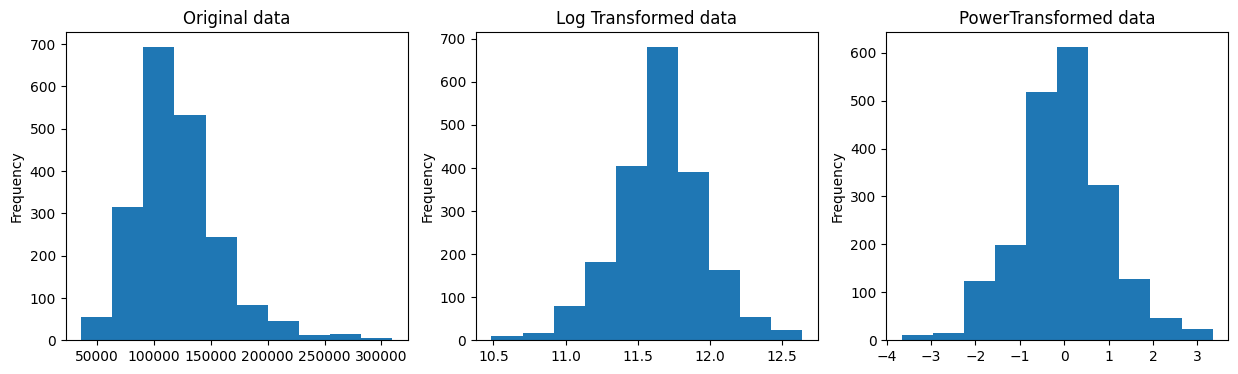

In [27]:
# PowerTransform data
feature = df['Income'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature)
array_1d = feature_transf.flatten()
feature = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_income = apply_log(df['Income'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4));

# Plot original data & get metrics
df['Income'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(df['Income'])

# Plot log transformed data & get metrics
log_transformed_income.plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed data')
norm_test2 = normality_test(log_transformed_income)

# Plot power transformed data & get metrics
feature.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])

In [28]:
normality_test(log_transformed_income)

NormaltestResult(statistic=32.357037046565075, pvalue=9.41366371618838e-08)

In [29]:
metrics

,statistic,pvalue
Original data,449.473326,2.500964e-98
Log transform,32.357037,9.413664e-08
PowerTransformer,27.859212,8.921730e-07


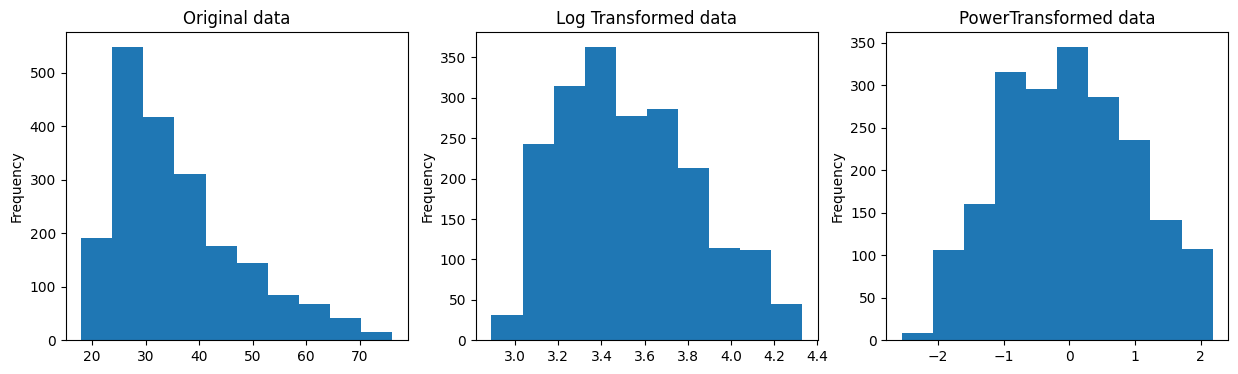

In [31]:
# PowerTransform data
feature2 = df['Age'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature2)
array_1d = feature_transf.flatten()
feature2 = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_age = apply_log(df['Age'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4));

# Plot original data & get metrics
df['Age'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(df['Age'])

# Plot log transformed data & get metrics
log_transformed_age.plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed data')
norm_test2 = normality_test(log_transformed_age)

# Plot power transformed data & get metrics
feature2.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature2)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])

In [32]:
metrics

,statistic,pvalue
Original data,255.475892,3.342834e-56
Log transform,111.094201,7.519703e-25
PowerTransformer,161.196197,9.924088e-36



Conclusions

After running the tests, we notice that the data isn't normally distributed yet, so neither the log transformation or the PowerTransformer were able to get it to a full normal distribution. Even though we get data that still isn't normally distributed, it has improved significantly from the initial tests. This means that our transformed data is a better approximation to normally distributed data than the original data, so we will use this transformed data instead.

    For the 'Age' feature, we transform the data using the Log Transform method with our function
    For the 'Income' feature, we use the PowerTransformer from scikit learn



In [34]:
df['transf_income'] = feature
df['transf_age']    = log_transformed_age


df_transformed = df.drop(['Income', 'Age', 'ID'], axis=1)
df_transformed.head()



,Sex,Marital status,Education,Occupation,Settlement size,transf_income,transf_age
0,0,0,2,1,2,0.239545,4.204693
1,1,1,1,1,2,0.869781,3.091042
2,0,0,1,0,0,-0.846121,3.891820
3,0,0,1,1,1,1.303766,3.806662
4,0,0,1,1,1,0.830970,3.970292



Feature Scaling (MinMaxScaler)

Since there are categorical features scaled between 0 and 1 ('Sex' feature), we will use scikit learn's MinMaxScaler to scale out data between 0 and 1. This is done so that the scale is equivalent to that of the 'Sex' feature (all values will be between zero and one). This is important for the K-Means clustering model, as it uses distance as a measure of similarity. Therefore, if we don't scale the features, we won't get accurate clusters.


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df_transformed)

In [36]:
X[0]

array([0.        , 0.        , 0.66666667, 0.5       , 1.        ,
       0.55651051, 0.91249369])

In [37]:
from sklearn.cluster import KMeans

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

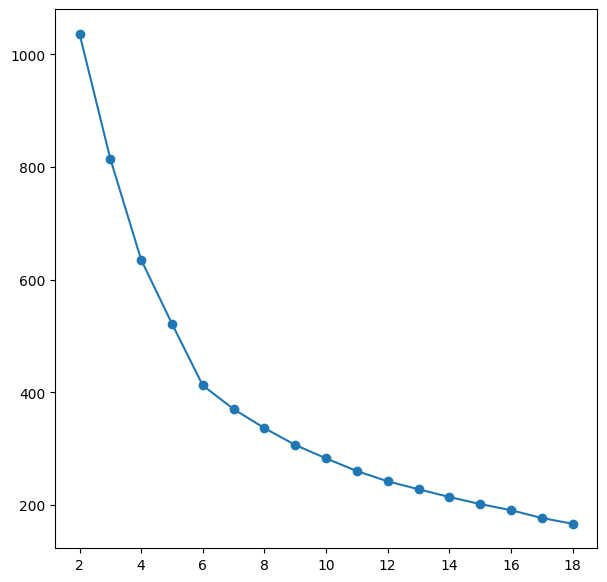

In [38]:


clusters_range=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=0).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')



When running the loop shown above, we notice that the elbow happens around 6-7 clusters, which would be a good approximation. The curve isn't very clear and you could also say that 12 is a good number as well, but you should understand that 12 clusters is generally too much, so we would rather lose some information about the groups our customers belong to, than gaining more accuracy in the clustering used

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

In [41]:
X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])

In [42]:
kmeans=KMeans(n_clusters=6, random_state=0).fit(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [43]:
labels = kmeans.labels_
X_pca_df['Labels'] = labels

In [44]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [45]:
X_pca_df.head(10)

,X1,X2,X3,Labels
0,0.829143,0.350518,-0.162403,3
1,-0.531854,0.719504,-0.230299,2
2,0.489493,-0.693627,0.175269,0
3,0.712487,-0.027906,-0.049583,3
4,0.718334,-0.036815,-0.052850,3
5,0.483132,-0.659081,0.175066,0
6,0.719851,-0.032467,-0.054705,3
7,0.775114,0.231674,-0.134209,3
8,-0.156933,-0.173657,0.765520,4
9,-0.019959,0.288473,0.606919,4


In [46]:
X_pca_df['Labels'] = X_pca_df['Labels'].astype(str)

In [58]:
results_df = df.drop(['ID', 'transf_income', 'transf_age'], axis=1)
results_df['Labels'] = kmeans.labels_
results_df = results_df.astype({'Sex':'int32', 'Marital status':'int32', 'Education':'int32', 'Occupation':'int32', 'Settlement size':'int32'})
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int32
 1   Marital status   2000 non-null   int32
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int32
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int32
 6   Settlement size  2000 non-null   int32
 7   Labels           2000 non-null   int32
dtypes: int32(6), int64(2)
memory usage: 78.2 KB



Visualization

We have already clustered the data into 6 distinct groups and done PCA to get 3 features out of the 7 we originally had. It is always important to remember that using PCA inherently means a loss of information, so the projections of the data in the new features X1, X2 and X3 can have some overlapping points, but in reality, when using K-Means clustering the border points are clearly defined.


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



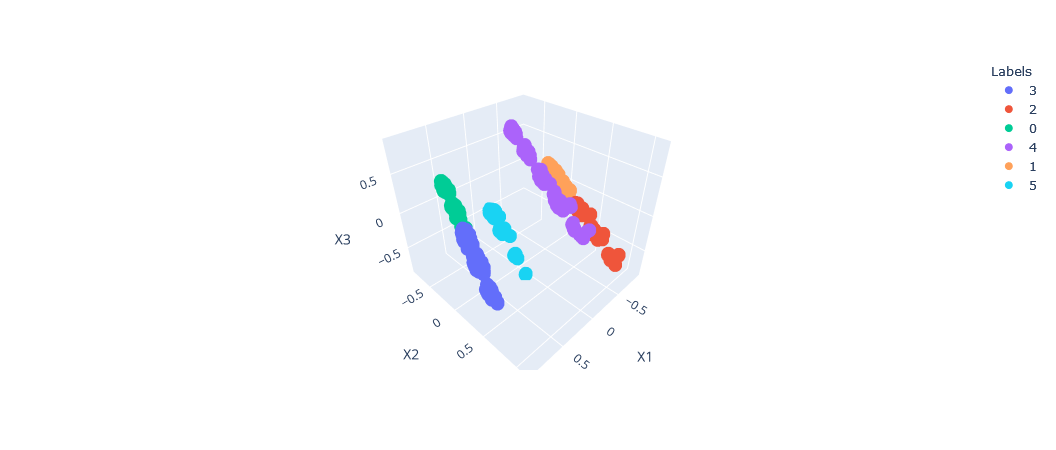

In [47]:
import plotly.express as px

fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Labels'])
fig.show()



Decision Tree as a method to interpret clusters:

An alternative way to visualize and understand clusters is by way of using decision trees. We can make a decision tree predict the labels of each cluster we have determined, and in doing so the tree will determine splitting points based on the features we pass to the model. In this way, we can create the cluster descriptions based on how the decision tree splits the data.

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [68]:
clf = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 5)

In [69]:
X_clusters = results_df.drop('Labels', axis=1)
y_clusters = results_df['Labels']

clf.fit(X_clusters, y_clusters)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

Evaluating the model to make sure interpretations are accurate:

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
predictions = clf.predict(X_clusters)
print(classification_report(y_clusters, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       312
           1       1.00      1.00      1.00       430
           2       1.00      0.99      1.00       306
           3       1.00      1.00      1.00       517
           4       1.00      1.00      1.00       257
           5       1.00      1.00      1.00       178

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Visualization of the Clustering Tree¶

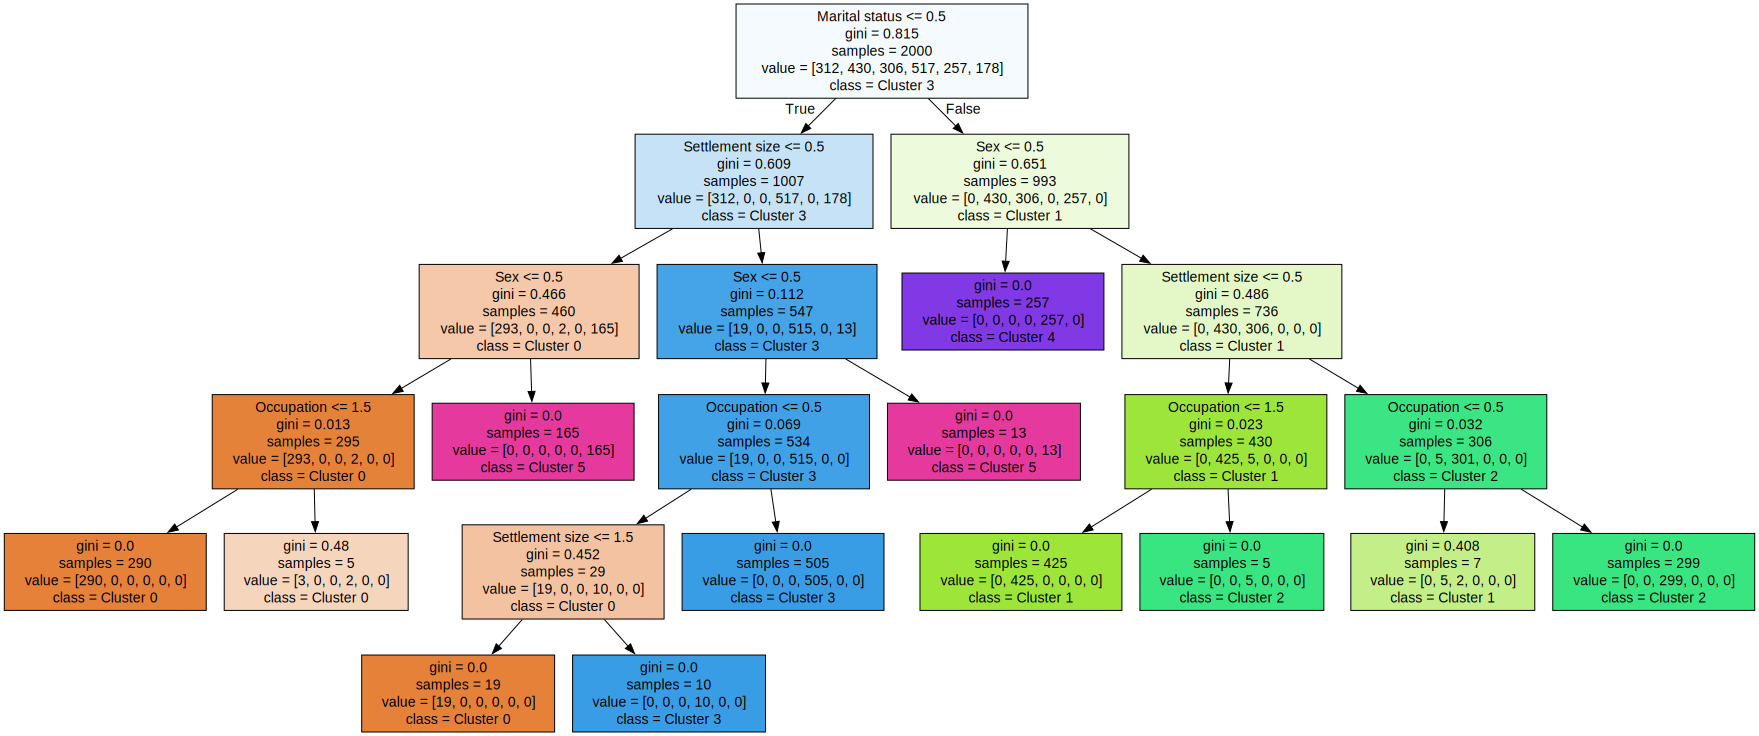

In [72]:
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=results_df.columns[:7],  
                                class_names=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph